In [8]:
import numpy as np 
import pandas as pd
import os

In [9]:
test_path = "/kaggle/input/pneumonia-chest-x-ray-dataset/test"
train_path = "/kaggle/input/pneumonia-chest-x-ray-dataset/train"
val_path = "/kaggle/input/pneumonia-chest-x-ray-dataset/val"

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

In [11]:
train_data_gen = ImageDataGenerator(
                                   rescale = 1/255,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   zoom_range = 0.5
                                   )
train_data = train_data_gen.flow_from_directory(
                                                batch_size=100,
                                                directory=train_path,
                                                shuffle=True,
                                                target_size=(150,150),
                                                class_mode='sparse')

Found 5216 images belonging to 2 classes.


In [12]:
val_data_gen = ImageDataGenerator(
                                   rescale = 1/255
                                   )
val_data = val_data_gen.flow_from_directory(
                                            batch_size=100,
                                            directory=val_path,
                                            shuffle=True,
                                            target_size=(150,150),
                                            class_mode='sparse'
                                            )

Found 16 images belonging to 2 classes.


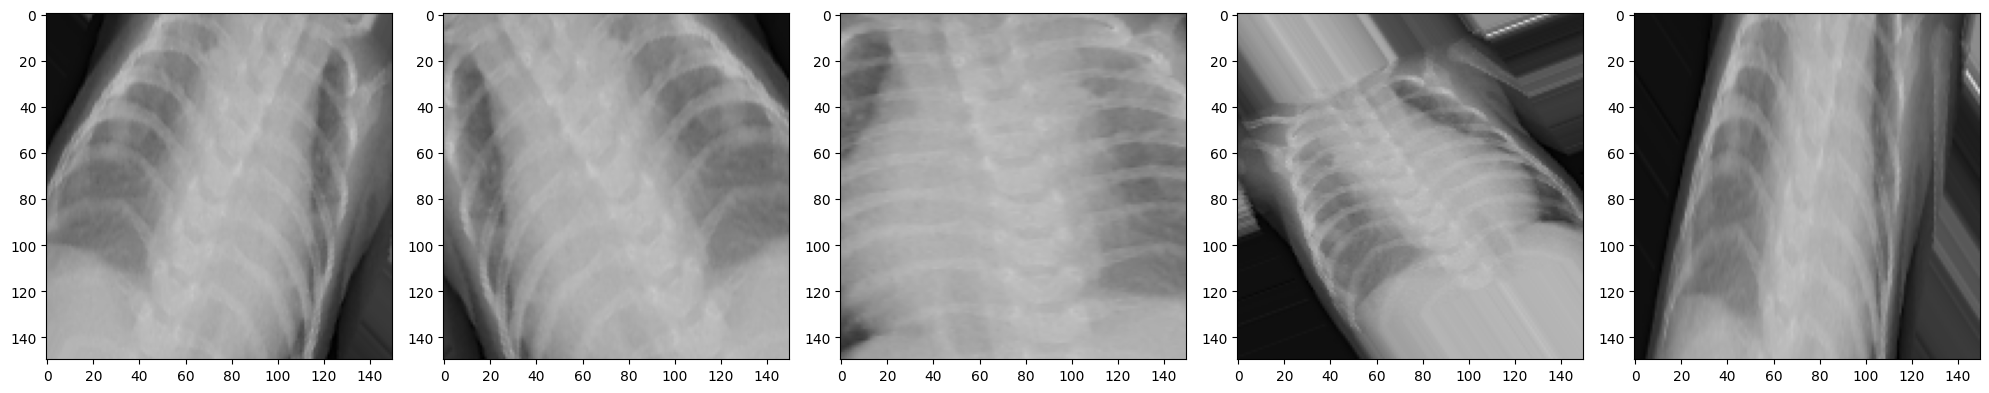

In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
model = Sequential()

model.add(Conv2D(16,3,activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
          
model.add(Flatten())
model.add(Dropout(0.2))
          
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2))

In [22]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model.compile(optimizer='adam',metrics=['accuracy'],loss=loss)

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(
    train_data,
    steps_per_epoch = int(np.ceil(train_data.n/ 100.0)),
    epochs=25,
    callbacks = [callback],
    validation_data=val_data,
    validation_steps=int(np.ceil(val_data.n / 100.0))
        )

Epoch 1/25
53/53 [==============================] - 93s 2s/step - loss: 0.5895 - accuracy: 0.8451 - val_loss: 12.5559 - val_accuracy: 0.5000
Epoch 2/25
53/53 [==============================] - 73s 1s/step - loss: 0.3060 - accuracy: 0.8815 - val_loss: 21.9208 - val_accuracy: 0.5000
Epoch 3/25
53/53 [==============================] - 73s 1s/step - loss: 0.2849 - accuracy: 0.8955 - val_loss: 10.9123 - val_accuracy: 0.5000
Epoch 4/25
53/53 [==============================] - 74s 1s/step - loss: 0.2478 - accuracy: 0.9015 - val_loss: 14.4652 - val_accuracy: 0.5000
Epoch 5/25
53/53 [==============================] - 73s 1s/step - loss: 0.2411 - accuracy: 0.9018 - val_loss: 15.2918 - val_accuracy: 0.5000
Epoch 6/25
53/53 [==============================] - 73s 1s/step - loss: 0.2293 - accuracy: 0.9116 - val_loss: 10.7412 - val_accuracy: 0.5000
Epoch 7/25
53/53 [==============================] - 74s 1s/step - loss: 0.2190 - accuracy: 0.9178 - val_loss: 11.2990 - val_accuracy: 0.5000
Epoch 8/25
53

In [24]:
test_gen = ImageDataGenerator(rescale=1/255)
test_data = test_gen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=100,
    class_mode='sparse'
)

Found 624 images belonging to 2 classes.


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
test_results = model.evaluate(test_data, steps=test_data.n / 100)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

6/6 [==============================] - 5s 737ms/step - loss: 0.4103 - accuracy: 0.8429
Test Loss: 0.41031304001808167
Test Accuracy: 0.8429487347602844
